In [101]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import numpy as np
%matplotlib inline
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

In [126]:
#Loading data
df = pd.read_csv('/Users/macintosh/Desktop/Clark University/Semester 2/BAN5573-BI/Project/churn.csv')
df.head()

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [4]:
df.tail()

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.5

#### 2.2.1 Number of Observations: </font>

In [5]:
df.shape

(10000, 14)

####  2.2.2	Field names

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### 2.2.3 Type of fields

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
table = df.describe(include='all')
table

          RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count 

## 3.1 Data Processing/Cleaning </font>

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 3.1.1 Outlier Detection

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


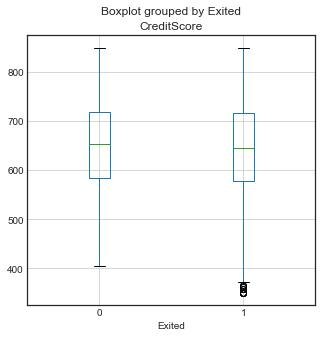

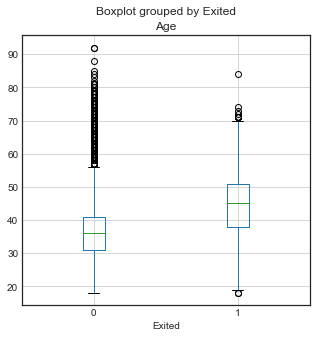

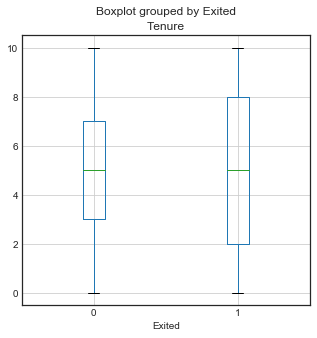

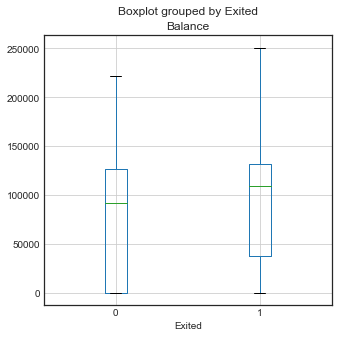

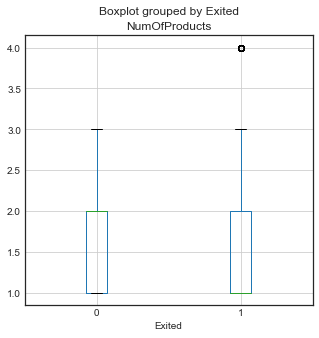

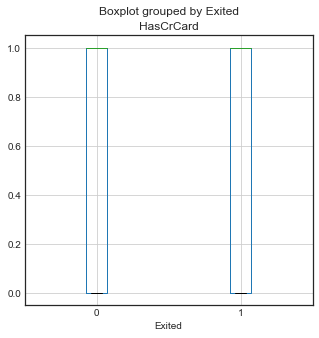

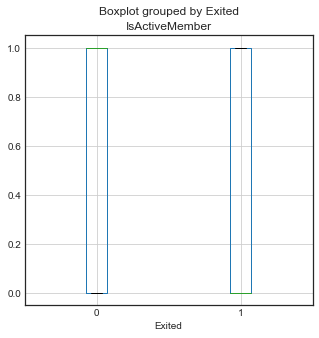

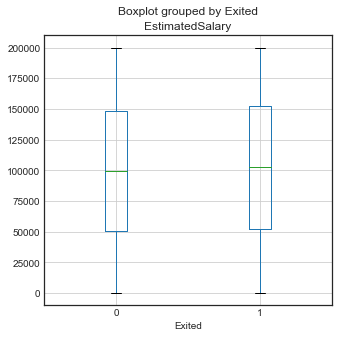

In [60]:
for i in df.columns.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender','Exited']):
    boxplot = df.boxplot(column=i, by = 'Exited',figsize=(5,5))

# Histogram   </font>


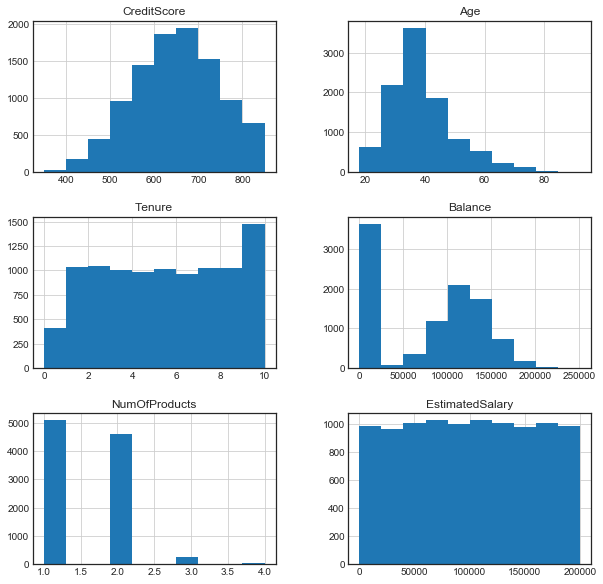

In [61]:
df.hist(column=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'], figsize=(10,10))
plt.show()

# Correlation Matrix heatmap

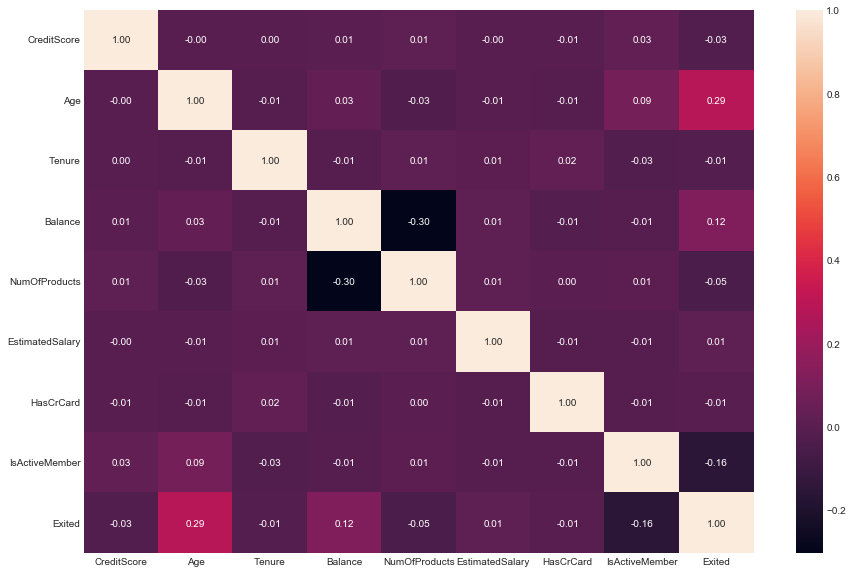

In [177]:
list1 = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','HasCrCard','IsActiveMember','Exited']
plt.figure(figsize=(15,10))
sns.heatmap(df[list1].corr(), annot=True, fmt=".2f")
plt.show()

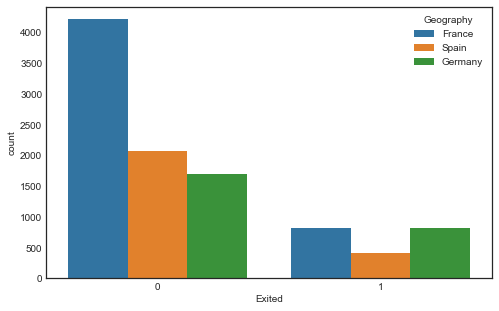

In [594]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='Geography', data=df)
plt.show()

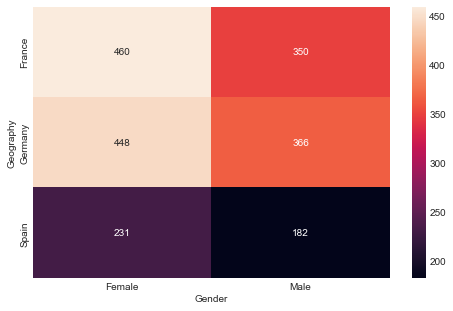

In [598]:
plt.figure(figsize=(8, 5))
crosstab = pd.crosstab(df['Geography'], df['Gender'], values=df['Exited'], aggfunc=np.sum)
sns.heatmap(crosstab, annot=True, fmt='d')
plt.show()

### Preprocessing & Feature Engineering

In [127]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [128]:
for i in range(len(df)):
    if df['EstimatedSalary'][i]<= 50000:
        df['EstimatedSalary'][i]= 'Poor'
    elif 50000 < df['EstimatedSalary'][i]<= 100000:
        df['EstimatedSalary'][i]= 'Good'
    elif 100000 < df['EstimatedSalary'][i]<= 200000:
        df['EstimatedSalary'][i]= 'Excellent'
    else:
        df['EstimatedSalary'][i]= "Top"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [129]:
for i in range(len(df)):
    if df['Balance'][i]<= 25000:
        df['Balance'][i]= 'Poor'
    elif 25000 < df['Balance'][i]<= 100000:
        df['Balance'][i]= 'Good'
    elif 100000 < df['Balance'][i]<= 200000:
        df['Balance'][i]= 'Excellent'
    else:
        df['Balance'][i]= "Top"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
df['Gender'],df['Geography'],df['Balance'],df['EstimatedSalary']=df['Gender'].astype('category'),df['Geography'].astype('category'),df['Balance'].astype('category'),df['EstimatedSalary'].astype('category')
df['Gender']=df.Gender.cat.codes
df['Geography']=df.Geography.cat.codes
df['Balance']=df.Balance.cat.codes
df['EstimatedSalary']=df.EstimatedSalary.cat.codes


In [131]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['CreditScore'] = scaler.fit_transform(df[['CreditScore']])
df['Age'] = scaler.fit_transform(df[['Age']])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  int8   
 2   Gender           10000 non-null  int8   
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  int8   
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  int8   
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), int8(4)
memory usage: 586.1 KB


In [17]:
df

      CreditScore  Geography  Gender       Age  Tenure  Balance  \
0       -0.326221          0       0  0.293517       2        2   
1       -0.440036          2       0  0.198164       1        1   
2       -1.536794          0       0  0.293517       8        0   
3        0.501521          0       0  0.007457       1        2   
4        2.063884          2       0  0.388871       2        0   
...           ...        ...     ...       ...     ...      ...   
9995     1.246488          0       1  0.007457       5        2   
9996    -1.391939          0       1 -0.373958      10        1   
9997     0.604988          0       0 -0.278604       7        2   
9998     1.256835          1       1  0.293517       3        1   
9999     1.463771          0       0 -1.041433       4        0   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1                0       1  
1                 1          0               1 

In [132]:
predictors = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
dependent_variable_name = ['Exited']

In [133]:
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
X = scale(X)
X = pd.DataFrame(X)
X.head()

          0         1         2         3         4         5         6  \
0 -0.326221 -0.901886 -1.095988  0.293517 -1.041760  1.207651 -0.911583   
1 -0.440036  1.515067 -1.095988  0.198164 -1.387538  0.117123 -0.911583   
2 -1.536794 -0.901886 -1.095988  0.293517  1.032908 -0.973405  2.527057   
3  0.501521 -0.901886 -1.095988  0.007457 -1.387538  1.207651  0.807737   
4  2.063884  1.515067 -1.095988  0.388871 -1.041760 -0.973405 -0.911583   

          7         8         9  
0  0.646092  0.970243 -0.901988  
1 -1.547768  0.970243 -0.901988  
2  0.646092 -1.030670 -0.901988  
3 -1.547768 -1.030670  0.309873  
4  0.646092  0.970243  0.309873  

In [134]:
Y = df[['Exited']]
Y

      Exited
0          1
1          0
2          1
3          0
4          0
...      ...
9995       0
9996       0
9997       1
9998       1
9999       0

[10000 rows x 1 columns]

In [21]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [144]:
from imblearn.under_sampling import RandomUnderSampler 

In [145]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X, Y)

In [146]:
y_train_rus.value_counts()

Exited
0         2037
1         2037
dtype: int64

### Decision Tree

In [135]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=100)

print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 8000
The number of records in the test dataset is 2000


In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from collections import Counter

In [27]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 1000, max_depth =8)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1000)

In [28]:
y_predic = clf.predict(X_test)
y_predic

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
print("Accuracy of this model is:", accuracy_score(y_test, y_predic))

Accuracy of this model is: 0.846


In [30]:
sco = accuracy_score(y_test, y_predic)*100

In [31]:
print("Our model is", sco, "accurate, that is an acceptable." )

Our model is 84.6 accurate, that is an acceptable.


In [32]:
print(classification_report(y_test, y_predic))


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1588
           1       0.70      0.43      0.54       412

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



In [33]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import graphviz
import pydot
from IPython.display import Image, display

In [35]:
feature_importances = clf.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

                 Importance
Age                0.405212
NumOfProducts      0.274261
IsActiveMember     0.087260
Balance            0.074301
CreditScore        0.059542
Geography          0.050179
Tenure             0.027691
Gender             0.013433
EstimatedSalary    0.007337
HasCrCard          0.000784

In [36]:
feature_importances_list = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

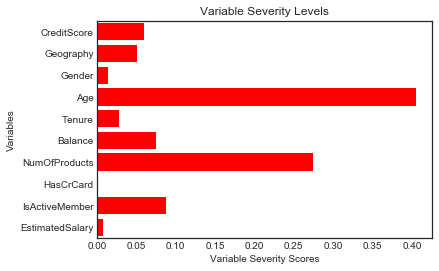

In [37]:
sns.barplot(x = feature_importances, y = feature_importances_list, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

In [ ]:
### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [139]:
y_pred=RF.predict(X_test)

In [140]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of model: 0.8555


In [41]:
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import confusion_matrix, classification_report

In [42]:
confusion_matrix(y_test, y_pred)

array([[1531,   57],
       [ 232,  180]])

In [43]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1588
           1       0.76      0.44      0.55       412

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [44]:
feature_importances = RF.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

                 Importance
Age                0.295035
CreditScore        0.218232
NumOfProducts      0.139873
Tenure             0.118010
Balance            0.048667
EstimatedSalary    0.046908
Geography          0.045048
IsActiveMember     0.040821
HasCrCard          0.025384
Gender             0.022022

In [45]:
feature_importances_list = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

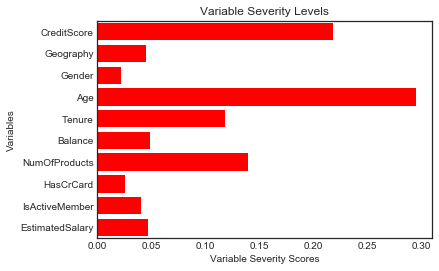

In [46]:
sns.barplot(x = feature_importances, y = feature_importances_list, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

#### logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [48]:
y_log_pred = log_model.predict(X_test)
y_log_pred.shape[0]

2000

In [49]:
print(y_log_pred)

[0 0 0 ... 0 0 0]


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
f1_score(y_test,y_log_pred)

0.22823984526112182

In [52]:
accuracy_score(y_test,y_log_pred)

0.8005

In [54]:
precision_score(y_test,y_log_pred)

0.5619047619047619

In [55]:
recall_score(y_test,y_log_pred)

0.14320388349514562

In [56]:
print(classification_report(y_test,y_log_pred))


              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1588
           1       0.56      0.14      0.23       412

    accuracy                           0.80      2000
   macro avg       0.69      0.56      0.56      2000
weighted avg       0.76      0.80      0.75      2000



In [57]:
feature_importances = log_model.coef_[0]
pd.DataFrame(data=feature_importances, index=predictors,
             columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

                 Importance
Age                0.770338
Geography          0.089376
HasCrCard         -0.009362
NumOfProducts     -0.014037
CreditScore       -0.060108
EstimatedSalary   -0.063977
Tenure            -0.073683
Gender            -0.254100
Balance           -0.308882
IsActiveMember    -0.536552

In [58]:
feature_importances_list = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

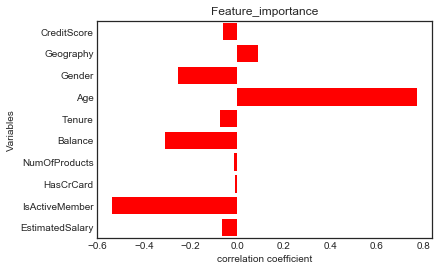

In [59]:
sns.barplot(x = feature_importances, y = feature_importances_list, color='r', saturation=1)
plt.xlabel('correlation coefficient')
plt.ylabel('Variables')
plt.title('Feature_importance')
plt.show()

### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

In [66]:
KNN.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [67]:
y_pred=KNN.predict(X_test)

In [68]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy of model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of model: 0.8265


In [69]:
confusion_matrix(y_test, y_pred)

array([[1508,   80],
       [ 267,  145]])

In [70]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1588
           1       0.64      0.35      0.46       412

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000



In [ ]:
### Voting 

In [71]:
from sklearn.ensemble import  VotingClassifier 
Classifier = VotingClassifier(estimators=[
('DT', clf), ('RF', RF),('LogReg',log_model),('KNN',KNN)],voting='soft',flatten_transform=True) 
eclf1 = Classifier.fit(X_train , y_train)
print(Classifier.score(X_test,y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8485


In [72]:
y_pred=Classifier.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1588
           1       0.78      0.37      0.50       412

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.70      2000
weighted avg       0.84      0.85      0.83      2000



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

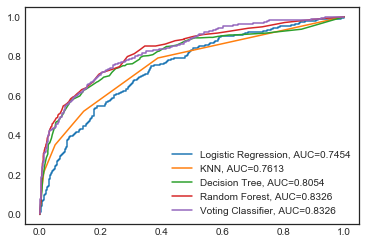

In [74]:
np.random.seed(42)

#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit KNN model and plot ROC curve
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#fit Decision Tree model and plot ROC curve
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1000, max_depth =8)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit Random Forest model and plot ROC curve
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit Voting Classifier model and plot ROC curve
model = VotingClassifier(estimators=[
('DT', clf), ('RF', RF),('LogReg',log_model),('KNN',KNN)],voting='soft',flatten_transform=True) 
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Voting Classifier, AUC="+str(auc))

#add legend
plt.legend()